In [1]:
!pip install pandas

# jupyter notebook 이란?

In [2]:
%%html

<style>
.hello-world {
    border: 1px solid black;
    width: 300px;
    height: 50px;
    font-size: 2em;
    padding: 0.3em;
}
</style>

<div class='hello-world'>
Community day!
</div>

In [3]:
import pandas as pd
print pd.__version__

0.18.0


# pandas 란?

### 데이터 분석을 용이하게 하고, dataframe , series 와 같은 데이터 객체를 통해 쉽게 가공
### 평균, 분산, 최대, 최소값 등을 쉽게 연산하며, 데이터 사이 간 연관성, 그루핑 조인 등 함수를 통해 matrix 형식으로 쉽게 변환

## dataframe 과 series 차이 

### series : 1차원 배열을 다루며, index(key) / value 형식의 자료구조이다. 

In [90]:
series_1 = pd.Series([11,22,33,44], index=['a', 'b','c', 'd'])
# series_1 = pd.Series([11,22,33,44])
series_1

a    11
b    22
c    33
d    44
dtype: int64

In [91]:
print series_1[0]
print series_1 * 2
print 33 in series_1

11
a    22
b    44
c    66
d    88
dtype: int64
False


In [92]:
series_1.c

33

### dataframe : 2차원 배열을 다루며, index와 column 그리고 데이터 형식의 자료구조이다.

In [93]:
data = {'candidate': ['moon', 'red', 'ahn', 'you', 'sim'], 'year': 2017, 'rate': [41.1, 24.0, 21.4, 6.8, 6.2]} 

In [94]:
df_1 = pd.DataFrame(data)
df_1

,candidate,rate,year
0,moon,41.1,2017
1,red,24.0,2017
2,ahn,21.4,2017
3,you,6.8,2017
4,sim,6.2,2017


In [95]:
srs_1 = pd.Series(data)
srs_1

candidate      [moon, red, ahn, you, sim]
rate         [41.1, 24.0, 21.4, 6.8, 6.2]
year                                 2017
dtype: object

In [96]:
srs_1[1]

[41.1, 24.0, 21.4, 6.8, 6.2]

In [97]:
df_1.T

,0,1,2,3,4
candidate,moon,red,ahn,you,sim
rate,41.1,24,21.4,6.8,6.2
year,2017,2017,2017,2017,2017


In [98]:
df_1[:1]

,candidate,rate,year
0,moon,41.1,2017


# -------------------------------------

# 데이터 분석 시작하기 

# -------------------------------------

# 타이타닉 호 승객 데이터 (from kaggle)

In [99]:
# PassengerId	            	Key
# survived	                    Survival	0 = No, 1 = Yes
# pclass                        1,2,3 등석
# name
# sex
# Age
# sibsp	                        함께 탑승한 형제 또는 배우자 
# parch	                        함께 탑승한 부모 또는 자녀의 수 
# ticket                        티켓 번호
# fare	                        티켓 요금
# cabin	                        선실 번호
# embarked	                    탑승한 곳

In [100]:
# train_df = pd.read_csv('~/Downloads/train.csv')
train_df = pd.read_csv('/Users/suhyunjeon/Downloads/train.csv')

In [101]:
train_df.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


# 데이터 셋 확인

In [102]:
type(train_df)

pandas.core.frame.DataFrame

In [103]:
train_df.shape

(891, 12)

In [104]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [105]:
train_df.Survived.describe()

count    891.000000
mean       0.383838
std        0.486592
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Survived, dtype: float64

In [106]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [107]:
train_df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [108]:
train_df.Name.head(1)

0    Braund, Mr. Owen Harris
Name: Name, dtype: object

In [109]:
print train_df.Survived.count()
print train_df.Age.count()

891
714


In [112]:
train_df2 = train_df.copy()
train_df2.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


## 사용하지 않는 feature 제거

In [113]:
# axis=1 denotes that we are referring to a column, not a row

In [114]:
train_df2 = train_df2.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin'], axis=1)

In [115]:
train_df2.head(2)

,Survived,Pclass,Sex,Age,Embarked
0,0,3,male,22.0,S
1,1,1,female,38.0,C


## 원하는 feature 의 data type 변경

In [117]:
train_df2['Age'] = train_df2['Age'].astype(int)

ValueError: Cannot convert NA to integer

In [118]:
train_df2.describe()

,Survived,Pclass,Age
count,891.000000,891.000000,714.000000
mean,0.383838,2.308642,29.699118
std,0.486592,0.836071,14.526497
min,0.000000,1.000000,0.420000
25%,0.000000,2.000000,20.125000
50%,0.000000,3.000000,28.000000
75%,1.000000,3.000000,38.000000
max,1.000000,3.000000,80.000000


## missing value 제거 

In [120]:
train_df2_nn = train_df2.dropna()

In [121]:
train_df2_nn.describe()

,Survived,Pclass,Age
count,712.000000,712.000000,712.000000
mean,0.404494,2.240169,29.642093
std,0.491139,0.836854,14.492933
min,0.000000,1.000000,0.420000
25%,0.000000,1.000000,20.000000
50%,0.000000,2.000000,28.000000
75%,1.000000,3.000000,38.000000
max,1.000000,3.000000,80.000000


In [122]:
train_df2_nn['Age'] = train_df2_nn['Age'].astype(int)

/Users/suhyunjeon/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [123]:
train_df2_nn.head()

,Survived,Pclass,Sex,Age,Embarked
0,0,3,male,22,S
1,1,1,female,38,C
2,1,3,female,26,S
3,1,1,female,35,S
4,0,3,male,35,S


## 데이터 필터링

In [124]:
print train_df2_nn[train_df2_nn.Sex.str.contains('female')].count()
print train_df2_nn[train_df2_nn.Sex == 'female'].count()

Survived    259
Pclass      259
Sex         259
Age         259
Embarked    259
dtype: int64
Survived    259
Pclass      259
Sex         259
Age         259
Embarked    259
dtype: int64


In [125]:
print train_df2_nn.Sex.count()
print train_df2[train_df2.Sex.str.contains('female')].count()
print train_df2[train_df2.Sex == 'male'].count()

712
Survived    314
Pclass      314
Sex         314
Age         261
Embarked    312
dtype: int64
Survived    577
Pclass      577
Sex         577
Age         453
Embarked    577
dtype: int64


In [126]:
train_df2_nn[train_df2_nn.Sex.str.contains('female')].count()

Survived    259
Pclass      259
Sex         259
Age         259
Embarked    259
dtype: int64

In [128]:
train_df2_nn[(train_df2_nn.Sex == 'male') & (train_df2_nn.Age < 2)]

,Survived,Pclass,Sex,Age,Embarked
78,1,2,male,0,S
164,0,3,male,1,S
183,1,2,male,1,S
305,1,1,male,0,S
386,0,3,male,1,S
755,1,2,male,0,S
788,1,3,male,1,S
803,1,3,male,0,C
827,1,2,male,1,C
831,1,2,male,0,S


# 데이터 시각화 

### matplotlib 는 python 을 활용한 데이터 시각화 libraray 이며, 데이터 분포 및 패턴을 확인할 수 있고
### histogram, bar 와 같은 차트를 그릴 수 있다

In [129]:
import matplotlib.pyplot as plt
%matplotlib inline

In [130]:
# create a new figure of size 18*6 points, using 1,600 dots per inch
fig = plt.figure(figsize=(18,6), dpi=1600)

## 생존자 / 사망자 수

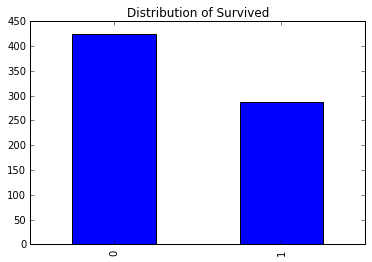

In [131]:
train_df2_nn.Survived.value_counts().plot(kind='bar');
plt.title('Distribution of Survived')

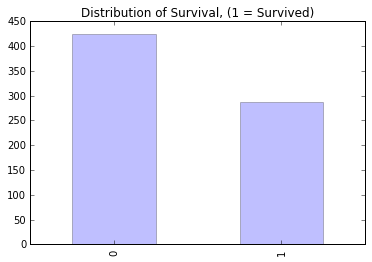

In [132]:
train_df2_nn.Survived.value_counts().plot(kind='bar', alpha=0.25) # 투명도
plt.title('Distribution of Survival, (1 = Survived)');

## plot 그리기

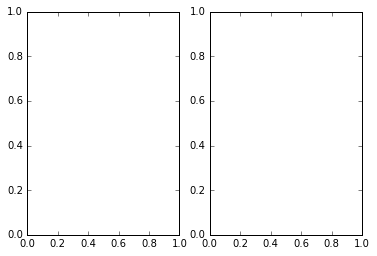

In [133]:
fig = plt.figure()
ax1 = fig.add_subplot(1,2,1) # 전체 창을 가로 1칸, 세로 1칸으로 쪼개고 그 중 첫 번째 칸에 ax라는 이름의 axes를 생성한다
ax2 = fig.add_subplot(1,2,2)
plt.show()

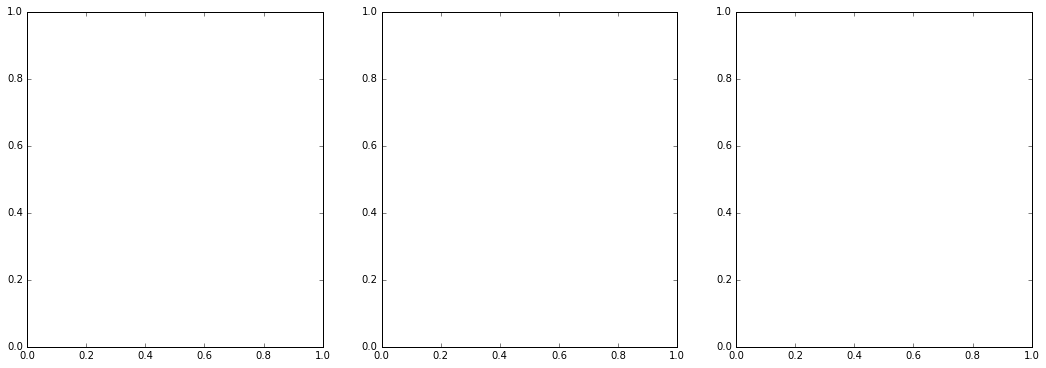

In [134]:
# 위와 같은 경우, 전체 창을 가로 1칸, 세로 2칸으로 쪼개고, 그 중 첫 번째 칸에 ax1, 두 번째 칸에 ax2를 생성한다.
# fig = plt.figure(figsize=(18,6), dpi=1600)
fig = plt.figure(figsize=(18,6), dpi=1600)
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)
plt.show()

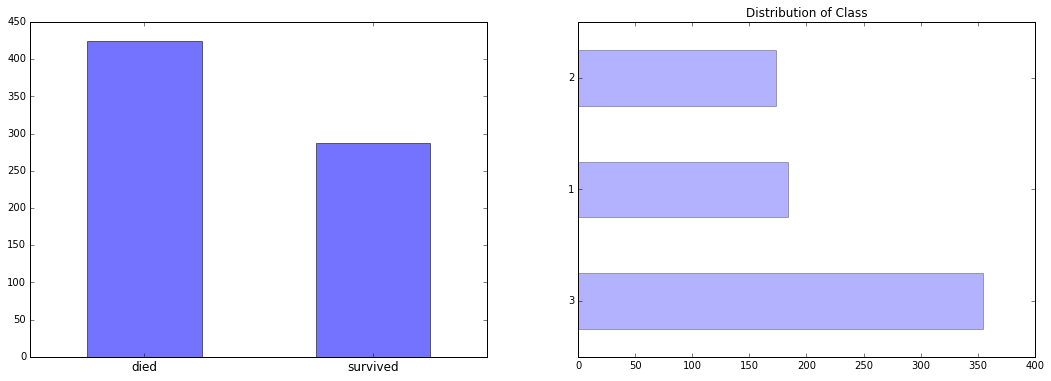

In [135]:
# fig = plt.figure()
fig = plt.figure(figsize=(18,6), dpi=1600)
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

train_df2_nn.Survived.value_counts().plot(kind='bar', alpha=0.55, ax=ax1)
plt.title('Distribution of Survival, (1 = Survived)')
ax1.set_xticklabels(["died", "survived"], rotation=0, fontsize='large')

train_df2_nn.Pclass.value_counts().plot(kind='barh', alpha=0.3, ax=ax2)
plt.title('Distribution of Class')

## 좌석 등급 내 나이 분포도

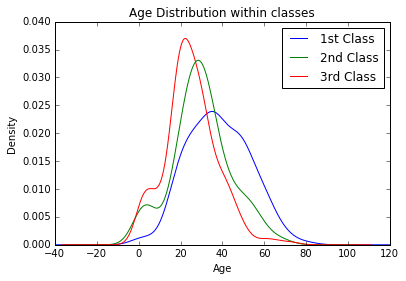

In [136]:
train_df2_nn.Age[train_df2_nn.Pclass == 1].plot(kind='kde')
train_df2_nn.Age[train_df2_nn.Pclass == 2].plot(kind='kde')
train_df2_nn.Age[train_df2_nn.Pclass == 3].plot(kind='kde')

plt.xlabel('Age')
plt.title('Age Distribution within classes')
plt.legend(('1st Class', '2nd Class', '3rd Class'), loc='best')

## 승객별 탑승 위치 

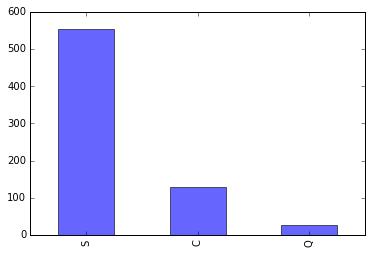

In [137]:
train_df2_nn.Embarked.value_counts().plot('bar', alpha=0.6);

## 좌석등급별 성별 생존자 

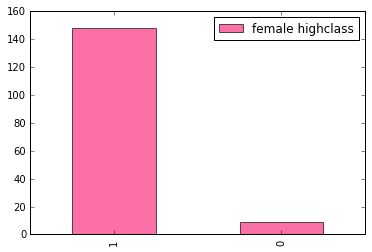

In [138]:
fig = plt.figure()
female_highclass_df = train_df2_nn.Survived[train_df2_nn.Sex == 'female'][train_df2_nn.Pclass != 3].value_counts()
female_highclass_df.plot(kind='bar', label='female highclass', color='#fa2479', alpha=0.65)
plt.legend(loc='best')

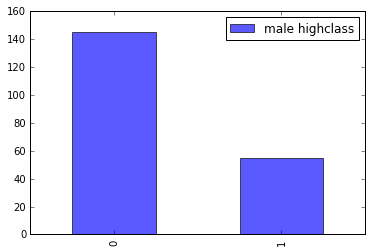

In [139]:
fig = plt.figure()
female_highclass_df = train_df2_nn.Survived[train_df2_nn.Sex == 'male'][train_df2_nn.Pclass != 3].value_counts()
female_highclass_df.plot(kind='bar', label='male highclass', color='blue', alpha=0.65)
plt.legend(loc='best')

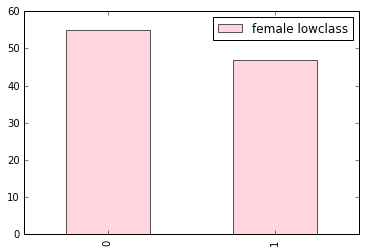

In [140]:
fig = plt.figure()
female_highclass_df = train_df2_nn.Survived[train_df2_nn.Sex == 'female'][train_df2_nn.Pclass == 3].value_counts()
female_highclass_df.plot(kind='bar', label='female lowclass', color='pink', alpha=0.65)
plt.legend(loc='best')

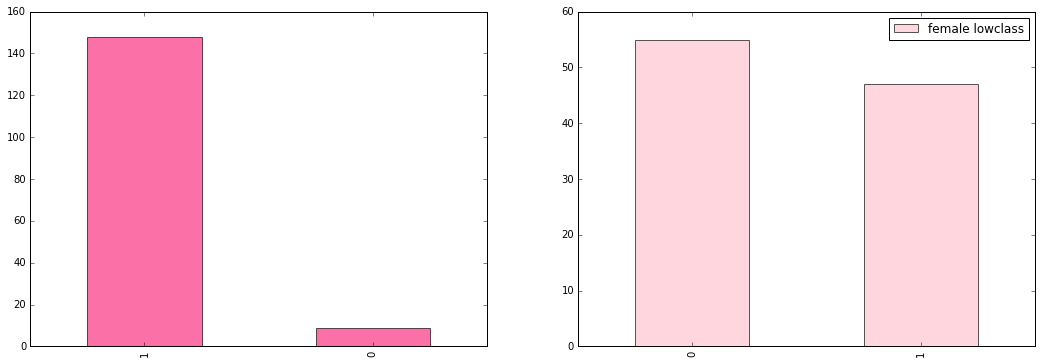

In [141]:
fig = plt.figure()
fig = plt.figure(figsize=(18,6), dpi=1600)
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

female_highclass_df = train_df2_nn.Survived[train_df2_nn.Sex == 'female'][train_df2_nn.Pclass != 3].value_counts()
female_highclass_df.plot(kind='bar', label='female highclass', color='#fa2479', alpha=0.65, ax=ax1)
plt.legend(loc='best')

female_highclass_df = train_df2_nn.Survived[train_df2_nn.Sex == 'female'][train_df2_nn.Pclass == 3].value_counts()
female_highclass_df.plot(kind='bar', label='female lowclass', color='pink', alpha=0.65, ax=ax2)
plt.legend(loc='best');

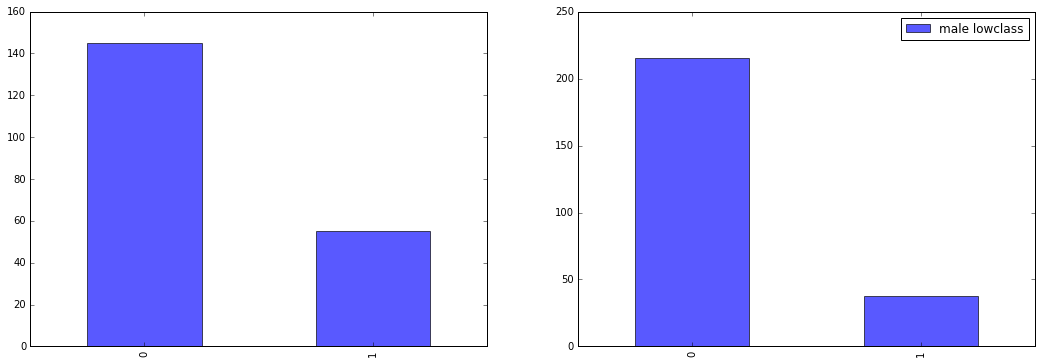

In [142]:
fig = plt.figure()
fig = plt.figure(figsize=(18,6), dpi=1600)
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

female_highclass_df = train_df2_nn.Survived[train_df2_nn.Sex == 'male'][train_df2_nn.Pclass != 3].value_counts()
female_highclass_df.plot(kind='bar', label='male highclass', color='blue', alpha=0.65, ax=ax1)
plt.legend(loc='best')

female_highclass_df = train_df2_nn.Survived[train_df2_nn.Sex == 'male'][train_df2_nn.Pclass == 3].value_counts()
female_highclass_df.plot(kind='bar', label='male lowclass', color='blue', alpha=0.65, ax=ax2)
plt.legend(loc='best')

## 각 feature 간의 상관관계 

In [143]:
train_df2_nn.corr()

,Survived,Pclass,Age
Survived,1.000000,-0.356462,-0.082377
Pclass,-0.356462,1.000000,-0.366125
Age,-0.082377,-0.366125,1.000000


In [144]:
train_df2_nn.corr().iloc[:-1,-1]

Survived   -0.082377
Pclass     -0.366125
Name: Age, dtype: float64

In [145]:
train_df2_nn['Survived'].corr(train_df2_nn['Age'])

-0.082377077093748682

In [147]:
train_df2_nn.corr()

,Survived,Pclass,Age
Survived,1.000000,-0.356462,-0.082377
Pclass,-0.356462,1.000000,-0.366125
Age,-0.082377,-0.366125,1.000000


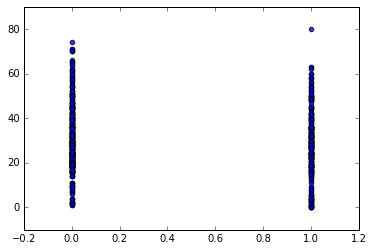

In [148]:
plt.scatter(train_df2_nn['Survived'], train_df2_nn['Age'], marker='o', alpha=0.8)

In [153]:
train_df2_nn['Survived'].corr(train_df2_nn['Pclass'])

-0.35646158844523829

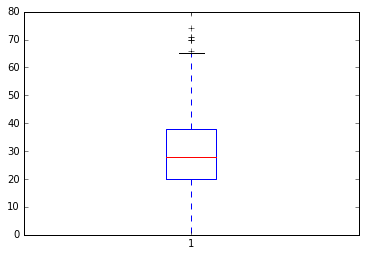

In [154]:
plt.boxplot(train_df2_nn['Age']);

        Survived   Age
Pclass                
1            120  7010
2             83  5165
3             85  8916
Int64Index([1, 2, 3], dtype='int64', name=u'Pclass')


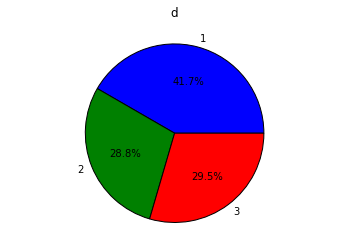

In [155]:
Pclass = train_df2_nn.groupby(['Pclass']).sum().stack()
temp = Pclass.unstack()
print temp
x_list = temp['Survived']
label_list = temp.index
print label_list
plt.axis('equal') #The pie chart is oval by default. To make it a circle use pyplot.axis("equal")
#To show the percentage of each pie slice, pass an output format to the autopctparameter 
plt.pie(x_list,labels=label_list, autopct="%1.1f%%") 
plt.title("d")
plt.show()

In [156]:
!python --version

Python 2.7.11 :: Anaconda 4.0.0 (x86_64)
